In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

from matplotlib import cm
from run import order

In [2]:
!rsync --progress "bluemoon-user1.uvm.edu:thesis/data/high_res/0.604-0.273.pkl" "../../data/"

0.604-0.273.pkl
  2731611702 100%   21.83MB/s    0:01:59 (xfer#1, to-check=0/1)

sent 38 bytes  received 2732278706 bytes  22674512.40 bytes/sec
total size is 2731611702  speedup is 1.00


In [22]:
file = "../../data/0.058-0.010.pkl"

In [23]:
metadata = pd.read_excel("../connectomes/mouse_meta.xlsx", sheet_name=None)
mtdt = metadata["Voxel Count_295 Structures"]
del(metadata)
mtdt = mtdt.loc[mtdt["Represented in Linear Model Matrix"] == "Yes"]
columns = []
cortices = [[0, 0]]
regions = mtdt["Major Region"].unique()
for region in regions:
    i = [columns.append(acronym.replace(" ", "")) for acronym in
         mtdt.loc[mtdt["Major Region"] == region, "Acronym"].values]
    cortices.append([cortices[-1][-1], cortices[-1][-1] + len(i)])
cortices.remove([0, 0])
del(mtdt)

In [24]:
%%time
with open(file, "rb") as f:
    [(b, i0, x_rev, λ, θ, μ, s, x_rest, α, n1, β, n2, G1, G2),
     sol, phase, χ, m] = pickle.load(f)

CPU times: user 1.63 s, sys: 8.12 s, total: 9.75 s
Wall time: 20.1 s


In [25]:
N = phase.shape[0]

In [26]:
y = sol.y.T.reshape(N, 3, -1)
t = sol.t
del(sol)

In [27]:
%%time
orders = np.array([order(phase[:, cortex[0]:cortex[1]]) for cortex in cortices]).T

CPU times: user 4.17 s, sys: 1.4 s, total: 5.58 s
Wall time: 6.31 s


In [28]:
def joy_plot(data, num=50):
    m = data.max()
    for step in np.linspace(data.shape[0]-1, 0, num=num, dtype=int):
        hist, bin_edges = np.histogram(data[step, :], bins=100,
                                       range=(0, 2*np.pi), density=True)
        plt.fill_between(bin_edges[:-1],
                         hist + 0.25*num*m*step/(data.shape[0]),
                         0.25*num*m*step/(data.shape[0]))

(0, 15.624123380232147)

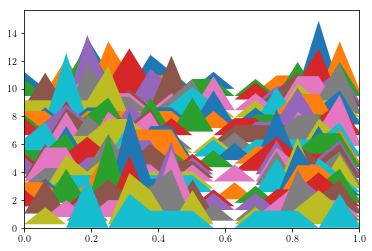

In [29]:
joy_plot(orders, num=40)
plt.xlim([0, 1])
plt.ylim(ymin=0)

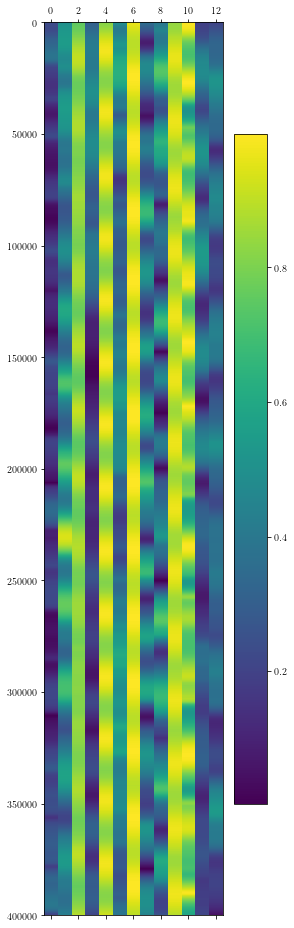

In [30]:
plt.matshow(orders, aspect="auto")
plt.colorbar()

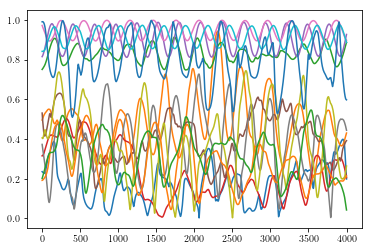

In [33]:
for cortex in orders.T:
    plt.plot(t, cortex)

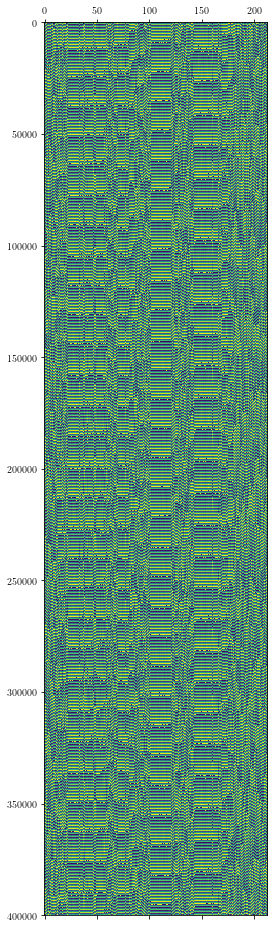

In [38]:
plt.matshow(phase, aspect="auto")